<a href="https://colab.research.google.com/github/itorman/Efecto-Fotoelectrico/blob/main/itorman/modeloAirBnb_aprendizajeTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

### <center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 3. Análisis libre de un catálogo de datos</header1></left>

Presentado por:
<br>
                Maria Aránzazu Martorell González  <br>
                Aitor Sáncez garzón                <br>
                Sergi Ibern Fernández              <br>
                Rafael Cobos Pineda                <br>


Fecha: 06/02/2025

# Importación de librerias necesarias

In [1]:
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install tensorflow

In [42]:
#Para esta actividad se importarán las siguientes librerías:

import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



## Cargar el Dataset


In [3]:
#Código para cargar el Dataset desde github. Se trata de un dataset público de airbnb que se ha subido a github para facilitar la descarga automática.

url = "https://raw.githubusercontent.com/arantxamartorell/master_unir_datasets/main/listings-csv.csv"

df = pd.read_csv(url,sep=";")                         #Se carga el archivo CSV
print("Forma del dataset:", df.shape)         #Se muestra la forma del dataset
print(df.head())                              #Se muestran las cinco primeras instancias


Forma del dataset: (11847, 24)
      id  host_is_superhost  host_identity_verified  \
0  18674                  0                       1   
1  23197                  1                       1   
2  32711                  0                       1   
3  34241                  0                       1   
4  34981                  0                       1   

               neighbourhood_cleansed       property_type        room_type  \
0                  la Sagrada Família  Entire rental unit  Entire home/apt   
1               el Besòs i el Maresme  Entire rental unit  Entire home/apt   
2  el Camp d'en Grassot i Gràcia Nova  Entire rental unit  Entire home/apt   
3                      el Barri Gòtic        Entire condo  Entire home/apt   
4                      el Barri Gòtic  Entire rental unit  Entire home/apt   

   accommodates  bathrooms  bedrooms  beds  ...  number_of_reviews_ltm  \
0             8        2.0         3     6  ...                      5   
1             5      

## Descripción de la fuente del Dataset

Se elige un dataset de dominio público de la web AirBnb, más concretamente, el dataset descargable en https://insideairbnb.com/get-the-data/

Se trata de un dataset que registra los detalles de los anuncios de alquileres turísticos en la ciudad de Barcelona publicados en la plataforma AirBnb durante el mes de diciembre de 2024.

## Explique el problema a resolver.
Se trata de agrupar los alojamientos ofrecidos por características similares de modo que cuando un cliente esté navegando por la web se le puedan recomendar alojamientos similares a las opciones que está eligiendo. Para ello se empleará un algoritmo de clustering con todos los datos disponibles.

## Caracterización del Dataset

Se trata de un dataset con 11847 instancias y 24 atributos.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11847 entries, 0 to 11846
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11847 non-null  object 
 1   host_is_superhost            11847 non-null  int64  
 2   host_identity_verified       11847 non-null  int64  
 3   neighbourhood_cleansed       11847 non-null  object 
 4   property_type                11847 non-null  object 
 5   room_type                    11847 non-null  object 
 6   accommodates                 11847 non-null  int64  
 7   bathrooms                    11847 non-null  float64
 8   bedrooms                     11847 non-null  int64  
 9   beds                         11847 non-null  int64  
 10  price                        11847 non-null  int64  
 11  minimum_nights_avg_ntm       11847 non-null  float64
 12  maximum_nights_avg_ntm       11847 non-null  float64
 13  number_of_review



Tenemos pues un datset con las siguientes características:

>- 11847 instancias en total.
>- 24 atributos de entrada:
   - 'id': Identificador único del anuncio. Cuantitativa discreta.
   - 'host_is_superhost': Variable binaria que expresa si el dueño del alojamiento está bien valorado.
   - 'host_identity_verified': Variable binaria que expresa si la identidad del dueño del alojamiento está verificada.
   - 'neighbourhood_cleansed': Nombre del barrio. Categórica.
   - 'property_type': Tipo de edificio en que se encuentra el alojamiento. Categórica.
   - 'room_type': Tipo de habitación. Categórica.
   - 'accommodates': Número de personas que caben en el alojamiento. Cuantitativa discreta.
   - 'bathrooms': Número de baños en el alojamiento. Cuantitativa discreta.
   - 'bedrooms': Número de dormitorios en el alojamiento. Cuantitativa discreta.
   - 'beds': Número de camas en el alojamiento. Cuantitativa discreta.
   - 'price': Precio por persona y noche. Cuantitativa continua.
   - 'minimum_nights_avg_ntm': Media del mínimo de noches que pasan allí las personas. Cuantitativa continua.      
   - 'maximum_nights_avg_ntm': Media del máximo de noches que pasan allí las personas. Cuantitativa continua.      
   - 'number_of_reviews': Número de reseñas del alojamiento. Cuantitativa discreta.              
   - 'number_of_reviews_ltm': Número de reseñas del alojamiento en el último año. Cuantitativa discreta.  
   - 'number_of_reviews_l30d': Número de reseñas del alojamiento en los últimos 30 días. Cuantitativa discreta.     
   - 'review_scores_rating': Puntuación de 1 a 5 que dan los usuarios al alojamiento. Cuantitativa continua.          
   - 'review_scores_accuracy': Puntuación de 1 a 5 que dan los usuarios a el cuidado del alojamiento. Cuantitativa continua.       
   - 'review_scores_cleanliness': Puntuación de 1 a 5 que dan los usuarios a la limpieza del alojamiento. Cuantitativa continua.      
   - 'review_scores_checkin': Puntuación de 1 a 5 que dan los usuarios al proceso de checkin del alojamiento. Cuantitativa continua.          
   - 'review_scores_communication': Puntuación de 1 a 5 que dan los usuarios a la comunicación sobre el alojamiento. Cuantitativa continua.     
   - 'review_scores_location': Puntuación de 1 a 5 que dan los usuarios a la ubicación del alojamiento. Cuantitativa continua.          
   - 'review_scores_value': Puntuación de 1 a 5 que dan los usuarios en genral al alojamiento. Cuantitativa continua.             
   - 'instant_bookable' Variable binaria que expresa si el alojamiento está disponible en ese momento.       


In [5]:
#Se quita el id de la primera columna
df = df.iloc[:, 1:]
#Se comprueba si hay campos vacíos. En el atributo 'health_condition' un campo vacío no es un error, sino que representa una buena condición física.
df.isna().sum()

,0
host_is_superhost,0
host_identity_verified,0
neighbourhood_cleansed,0
property_type,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0


In [6]:
#Se muestran los valores estadísticos más significativos de cada atributo cuantitativo
df.describe()

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
count,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,1.184700e+04,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000
mean,0.281844,0.954841,3.706930,1.367266,1.790158,2.553811,121.633240,15.094969,3.631386e+05,72.378155,18.105259,1.165021,4.591836,4.639645,4.622083,4.716602,4.715713,4.747687,4.449250,0.467291
std,0.449916,0.207662,2.198999,0.659610,1.094255,1.905443,208.529258,40.251295,2.790116e+07,120.394536,28.849666,2.263280,0.498655,0.485400,0.479612,0.449777,0.470686,0.368783,0.548082,0.498950
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,3.000000e+00,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,56.000000,2.000000,3.300000e+02,5.000000,2.000000,0.000000,4.470000,4.535000,4.500000,4.660000,4.660000,4.680000,4.310000,0.000000
50%,0.000000,1.000000,4.000000,1.000000,1.000000,2.000000,90.000000,3.500000,3.650000e+02,23.000000,7.000000,0.000000,4.700000,4.760000,4.750000,4.840000,4.850000,4.840000,4.560000,0.000000
75%,1.000000,1.000000,5.000000,2.000000,2.000000,3.000000,132.000000,31.000000,1.125000e+03,90.000000,28.000000,2.000000,4.900000,4.920000,4.920000,4.990000,5.000000,4.980000,4.760000,1.000000
max,1.000000,1.000000,16.000000,8.000000,16.000000,28.000000,9999.000000,979.200000,2.147484e+09,2896.000000,1273.000000,82.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [7]:
#Se recorren los atributos de entrada categóricos para saber cuáles son los valores que puede tomar cada uno
for feature in df:                                 #Se recorren las columnas
    if df[feature].dtype == 'object':              #Se comprueba si la columna es categórica
        unique_count = df[feature].nunique()
        unique_vals = df[feature].unique()
        print(f"{feature}: {unique_count} valores únicos, {unique_vals}")     #Se muestra el nombre de la columna y los valores únicos que contiene

neighbourhood_cleansed: 70 valores únicos, ['la Sagrada Família' 'el Besòs i el Maresme'
 "el Camp d'en Grassot i Gràcia Nova" 'el Barri Gòtic'
 "la Dreta de l'Eixample" 'el Poble Sec' 'la Vila Olímpica del Poblenou'
 'Sant Antoni' 'el Poblenou' "el Camp de l'Arpa del Clot" 'el Raval'
 'les Corts' 'la Vila de Gràcia' 'el Clot' 'el Fort Pienc'
 "la Nova Esquerra de l'Eixample" 'Sant Pere, Santa Caterina i la Ribera'
 'Diagonal Mar i el Front Marítim del Poblenou' 'Sants' 'Pedralbes'
 'el Guinardó' "l'Antiga Esquerra de l'Eixample" 'Sant Gervasi - Galvany'
 'la Barceloneta' 'Sant Martí de Provençals' 'el Congrés i els Indians'
 'Sarrià' 'el Parc i la Llacuna del Poblenou' 'Provençals del Poblenou'
 'la Bordeta' "la Font d'en Fargues" 'el Putxet i el Farró'
 'la Maternitat i Sant Ramon' 'Vallcarca i els Penitents' 'Navas'
 'Sants - Badal' 'Hostafrancs' 'el Carmel' 'la Salut' 'la Trinitat Vella'
 'la Font de la Guatlla' 'Sant Gervasi - la Bonanova' 'les Tres Torres'
 'la Teixonera' 'Can Ba

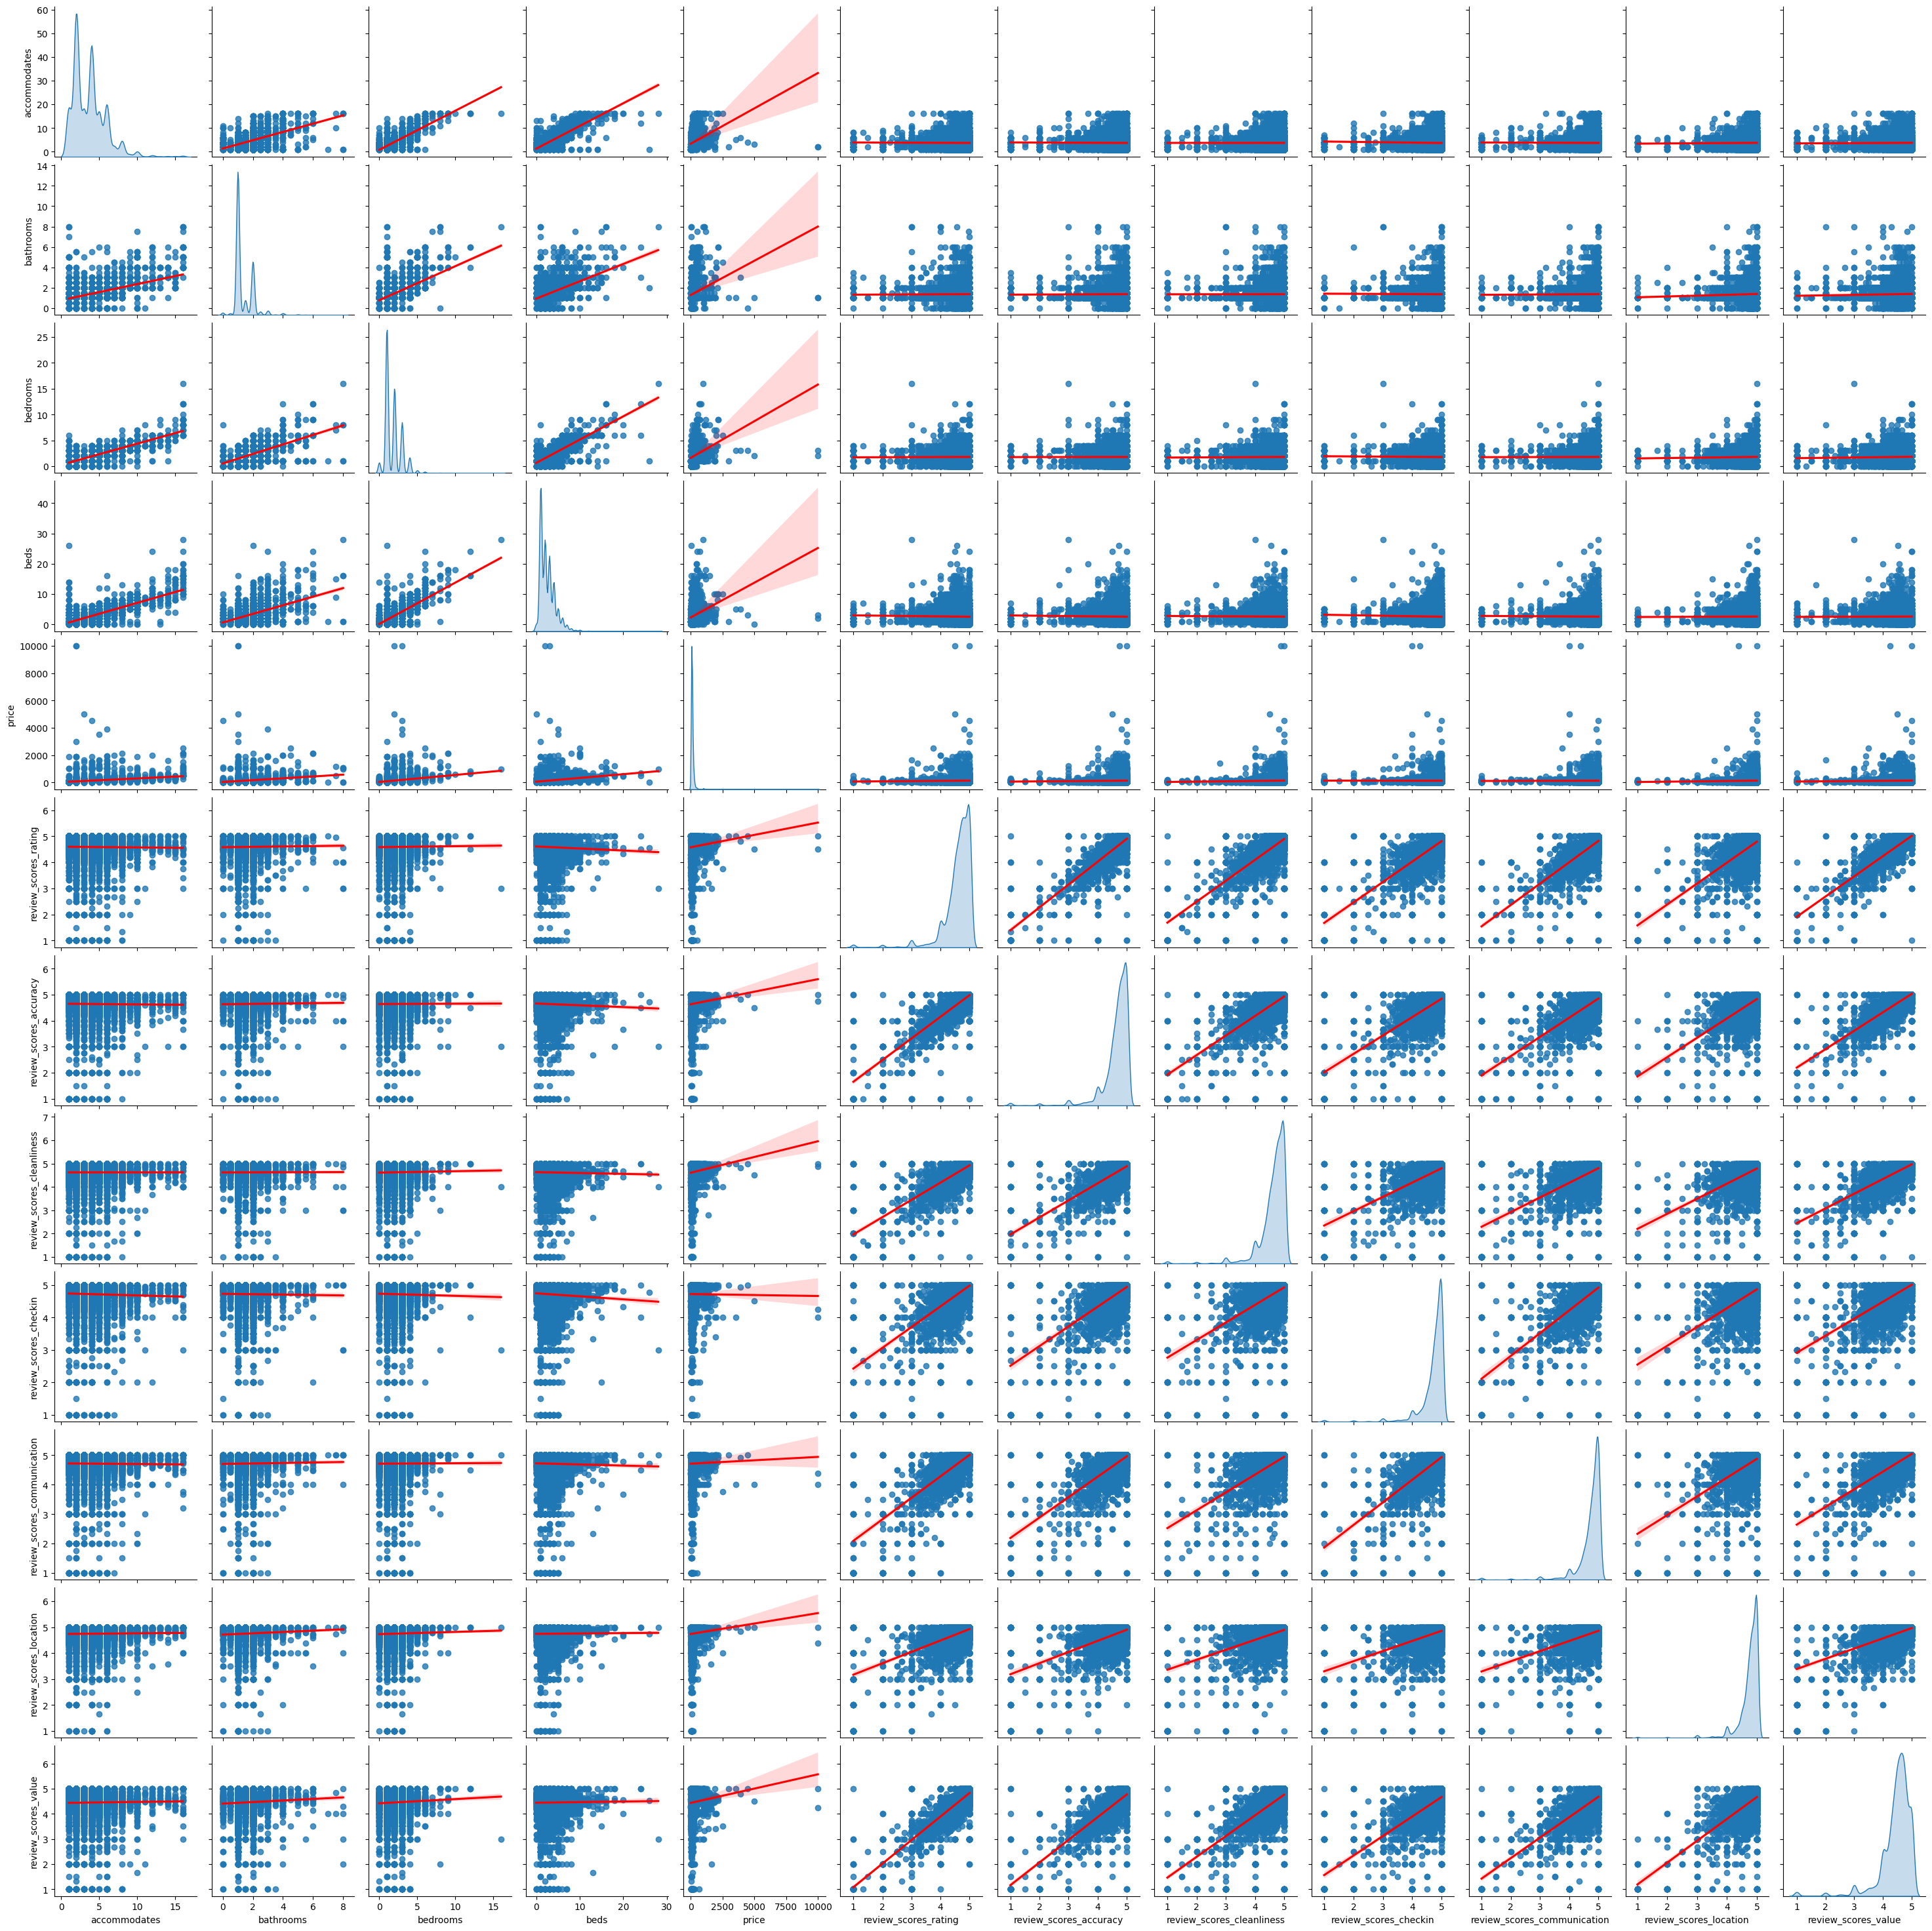

In [8]:
#Se representan las relacianes entre las variables continuas más relevantes.
sns.pairplot(df[["accommodates","bathrooms","bedrooms","beds","price","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]], kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}})

Se comprueba que las variables de tamaño y capacidad del alojamiento correlacionan de forma muy clara con el precio, pero no tanto con las reseñas de los usuarios. Se observan asimismo outliers muy claros en la variable precio y que todas las variables siguen distribuciones normales o parecidas a la normal, aunque las de capacidad y precio del alojamiento tienen valores extremos que representan alojamientos grandes o lujosos y son relevantes. Se van a representar los boxplot de esas variables para detectar valores atípicos en ellas.

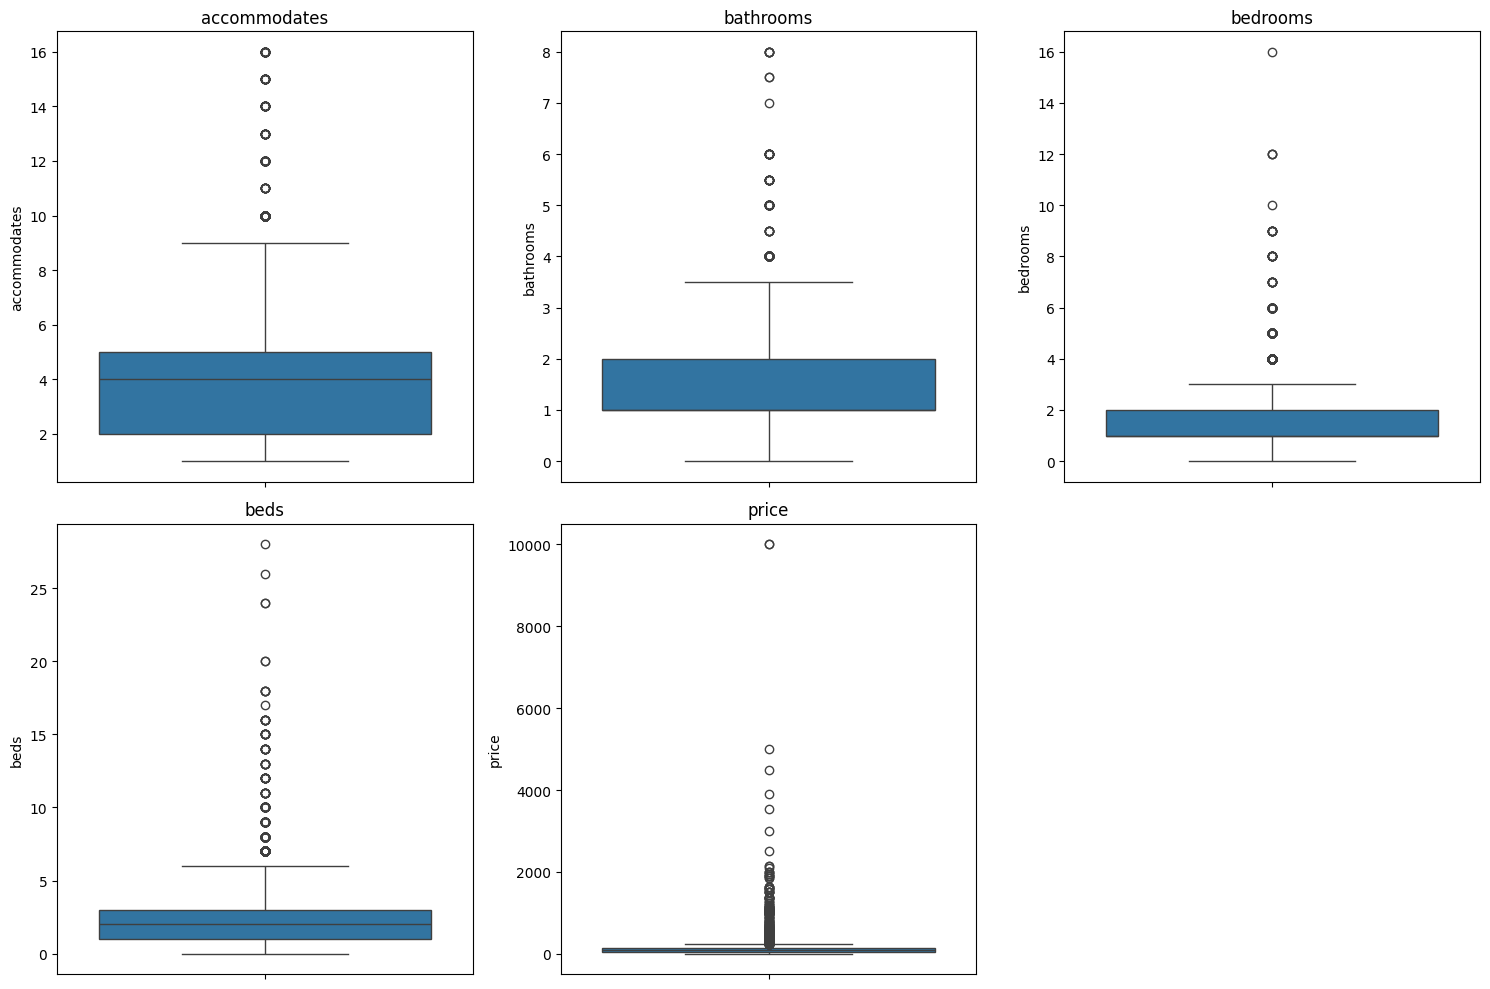

In [9]:

# Se eligen las variables a representar
columnas = ["accommodates", "bathrooms", "bedrooms", "beds", "price"]

# Crear la figura con 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Dibujar los boxplots en cada subplot
for i, col in enumerate(columnas):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Eliminar el subplot vacío (ya que tenemos 5 gráficos y 6 espacios)
fig.delaxes(axes[-1])

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


Se decide eliminar un único valor enorme en el precio (de 9999$) dado que de eliminar más podríamos estar eliminando información valiosa. Éste se elimina para evitar que este valor tan extremo deforme los clusters.

In [10]:
df = df[df["price"] < 9000]

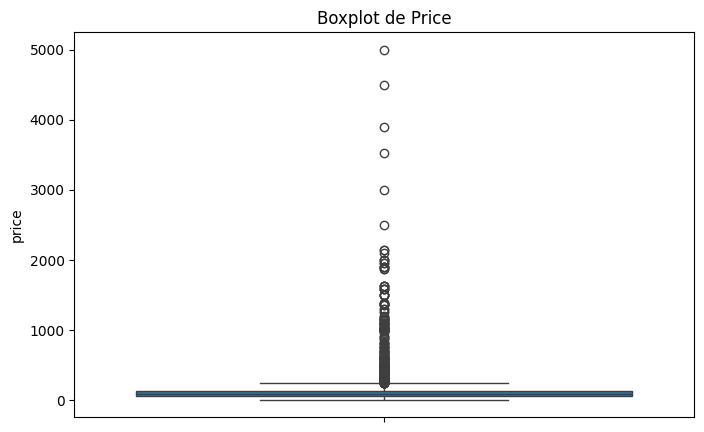

In [11]:
# Se visualiza de nuevo el precio sin el valor de 9999
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["price"])

# Agregar título
plt.title("Boxplot de Price")
plt.show()

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [33]:
#Se codifican las columnas categóricas mediante el método one-shot encoding y se normalizan las numéricas con MinMaxScaler combinándolas a continuación
scaler = MinMaxScaler()

columnas_categoricas = df.select_dtypes(include=['object']).columns       #Se separan las columnas categóricas y numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

df_categoricas_encoded = pd.get_dummies(df[columnas_categoricas], drop_first=True, dtype=int)      #Se aplica One-Hot Encoding a las columnas categóricas

df_numericas_normalized = scaler.fit_transform(df[columnas_numericas])                             #Se normalizan las columnas numéricas
df_numericas_normalized = pd.DataFrame(df_numericas_normalized, columns=columnas_numericas)        #Se les pone la cabecera de nuevo

df_numericas_normalized.reset_index(drop=True, inplace=True)                                       #Se reinician los índices para que no se desalineen
df_categoricas_encoded.reset_index(drop=True, inplace=True)

df_modelofinal = pd.concat([df_numericas_normalized, df_categoricas_encoded], axis=1)               #Se combinan las categóricas y las numéricas

df_modelofinal.tail()            #Se muestran las 5 últimas instancias para ver cómo queda el dataframe


,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,...,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in rental unit,property_type_Shared room in serviced apartment,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room
11840,1.0,1.0,0.200000,0.1250,0.1250,0.107143,0.040440,0.002760,1.685694e-07,0.000000,...,0,0,0,0,0,0,0,0,0,0
11841,0.0,1.0,0.600000,0.3125,0.2500,0.250000,0.032032,0.002760,5.224720e-07,0.000000,...,0,0,0,0,0,0,0,0,0,0
11842,0.0,1.0,0.533333,0.5000,0.2500,0.178571,0.032232,0.002760,1.303852e-08,0.000345,...,0,0,0,0,0,0,0,0,0,0
11843,0.0,1.0,0.066667,0.2500,0.0625,0.035714,0.005405,0.030669,1.685694e-07,0.000000,...,0,0,0,0,0,0,0,0,1,0
11844,0.0,1.0,0.066667,0.2500,0.0625,0.035714,0.005405,0.030669,5.224720e-07,0.000691,...,0,0,0,0,0,0,0,0,1,0


## Modelo

Para construir el modelo utilizaremos una técnica de aprendizaje automático con autoencoders usando TensorFlow, y aplicando un algoritmo de clustering K-means para segmentar los apartamentos similares. para ello procederemos con los siguientes pasos:



1.  Construccion el autoencoder: Red neuronal para aprender una representación comprimida del dataset.
2.  Compilar el modelo.
3.  Entrenar el modelo: Se entrena el autoencoder y se extrae la capa de codificación con su representación latente.
4.  Aplicación de la técnica de clustering (K-means): Agrupacion de apartamentos de similares características.



In [44]:


# Definir el tamaño de entrada basado en los datos preprocesados
input_dim = df_modelofinal.shape[1]

# Definir el Autoencoder
encoding_dim = 16  # Tamaño de la capa de codificación
autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(encoding_dim, activation="relu"),  # Capa codificada (representación latente)
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")  # Reconstrucción de la entrada
])

# Compilar el modelo
autoencoder.compile(optimizer="adam", loss="mse")

# Entrenar el Autoencoder
autoencoder.fit(df_modelofinal, df_modelofinal, epochs=50, batch_size=32, shuffle=True, verbose=1)

# Extraer la capa de codificación para obtener la representación latente
encoder = keras.Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[3].output)

# Obtener las representaciones latentes de los apartamentos
latent_features = encoder.predict(df_modelofinal)

# Aplicar K-Means sobre las características latentes para segmentar
num_clusters = 4  # Número de clusters que queremos // IMPORTANTE, seleccionar como segmentamos
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_modelofinal['cluster'] = kmeans.fit_predict(latent_features)

# Mostrar los primeros resultados
print(df_modelofinal[['cluster']].value_counts())


Epoch 1/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0961
Epoch 2/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0303
Epoch 3/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0278
Epoch 4/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0268
Epoch 5/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0248
Epoch 6/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0244
Epoch 7/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0234
Epoch 8/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0236
Epoch 9/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0227
Epoch 10/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0215
Epoch 11/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0213
Epoch 12/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0210
Epoch 13/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0215
Epoch 14/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0214
Epoch 15/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

### Visualización del resultado de la clusterización


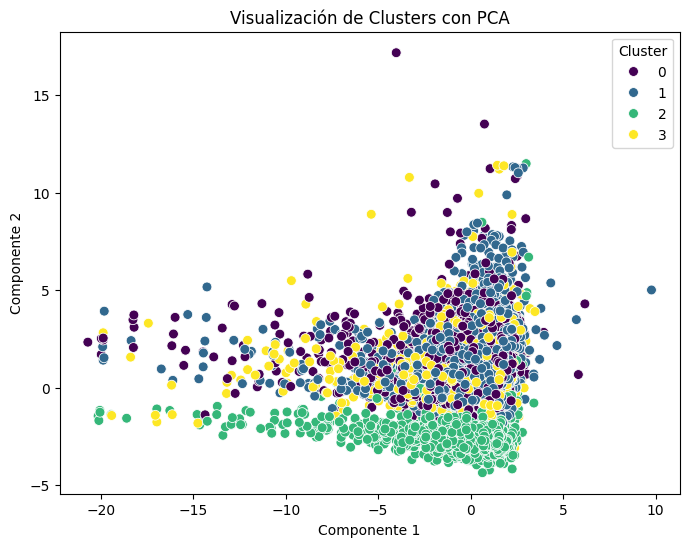

In [45]:
# Estandarizamos los datos
features = df_modelofinal.drop('cluster', axis=1)  # Excluimos la columna "cluster"
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#  Aplicamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaled_features)

# Obtenemos las etiquetas del cluster
labels = df_modelofinal['cluster']

# Creamos un scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette='viridis', s=50)
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Cluster')
plt.show()

### Explicación CPA (Principal Component Analysis)

El Análisis de Componentes Principales (PCA) es una técnica utilizada para reducir la dimensionalidad de los datos. En términos más simples, toma muchas características (columnas en tu conjunto de datos) y trata de encontrar un número menor de nuevas características que capturen la mayor parte de la información de los datos originales. Estas nuevas características se llaman componentes principales.

Componente 1: Representa la dirección en los datos que captura la mayor cantidad de variabilidad. Es el componente principal más importante. Es como el eje a lo largo del cual los puntos de datos están más dispersos.

Componente 2: Representa la dirección en los datos que captura la segunda mayor cantidad de variabilidad, después del Componente 1. Es el segundo componente principal más importante. Es ortogonal (perpendicular) al Componente 1, lo que significa que captura información independiente del primer componente.

### Explicación términos usados en el modelo

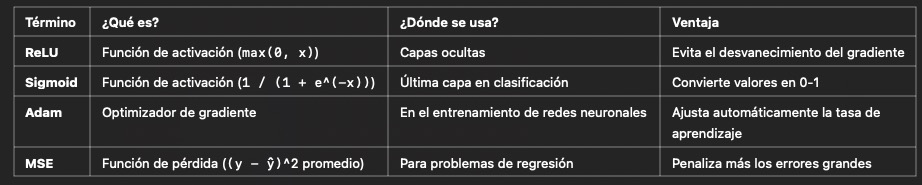

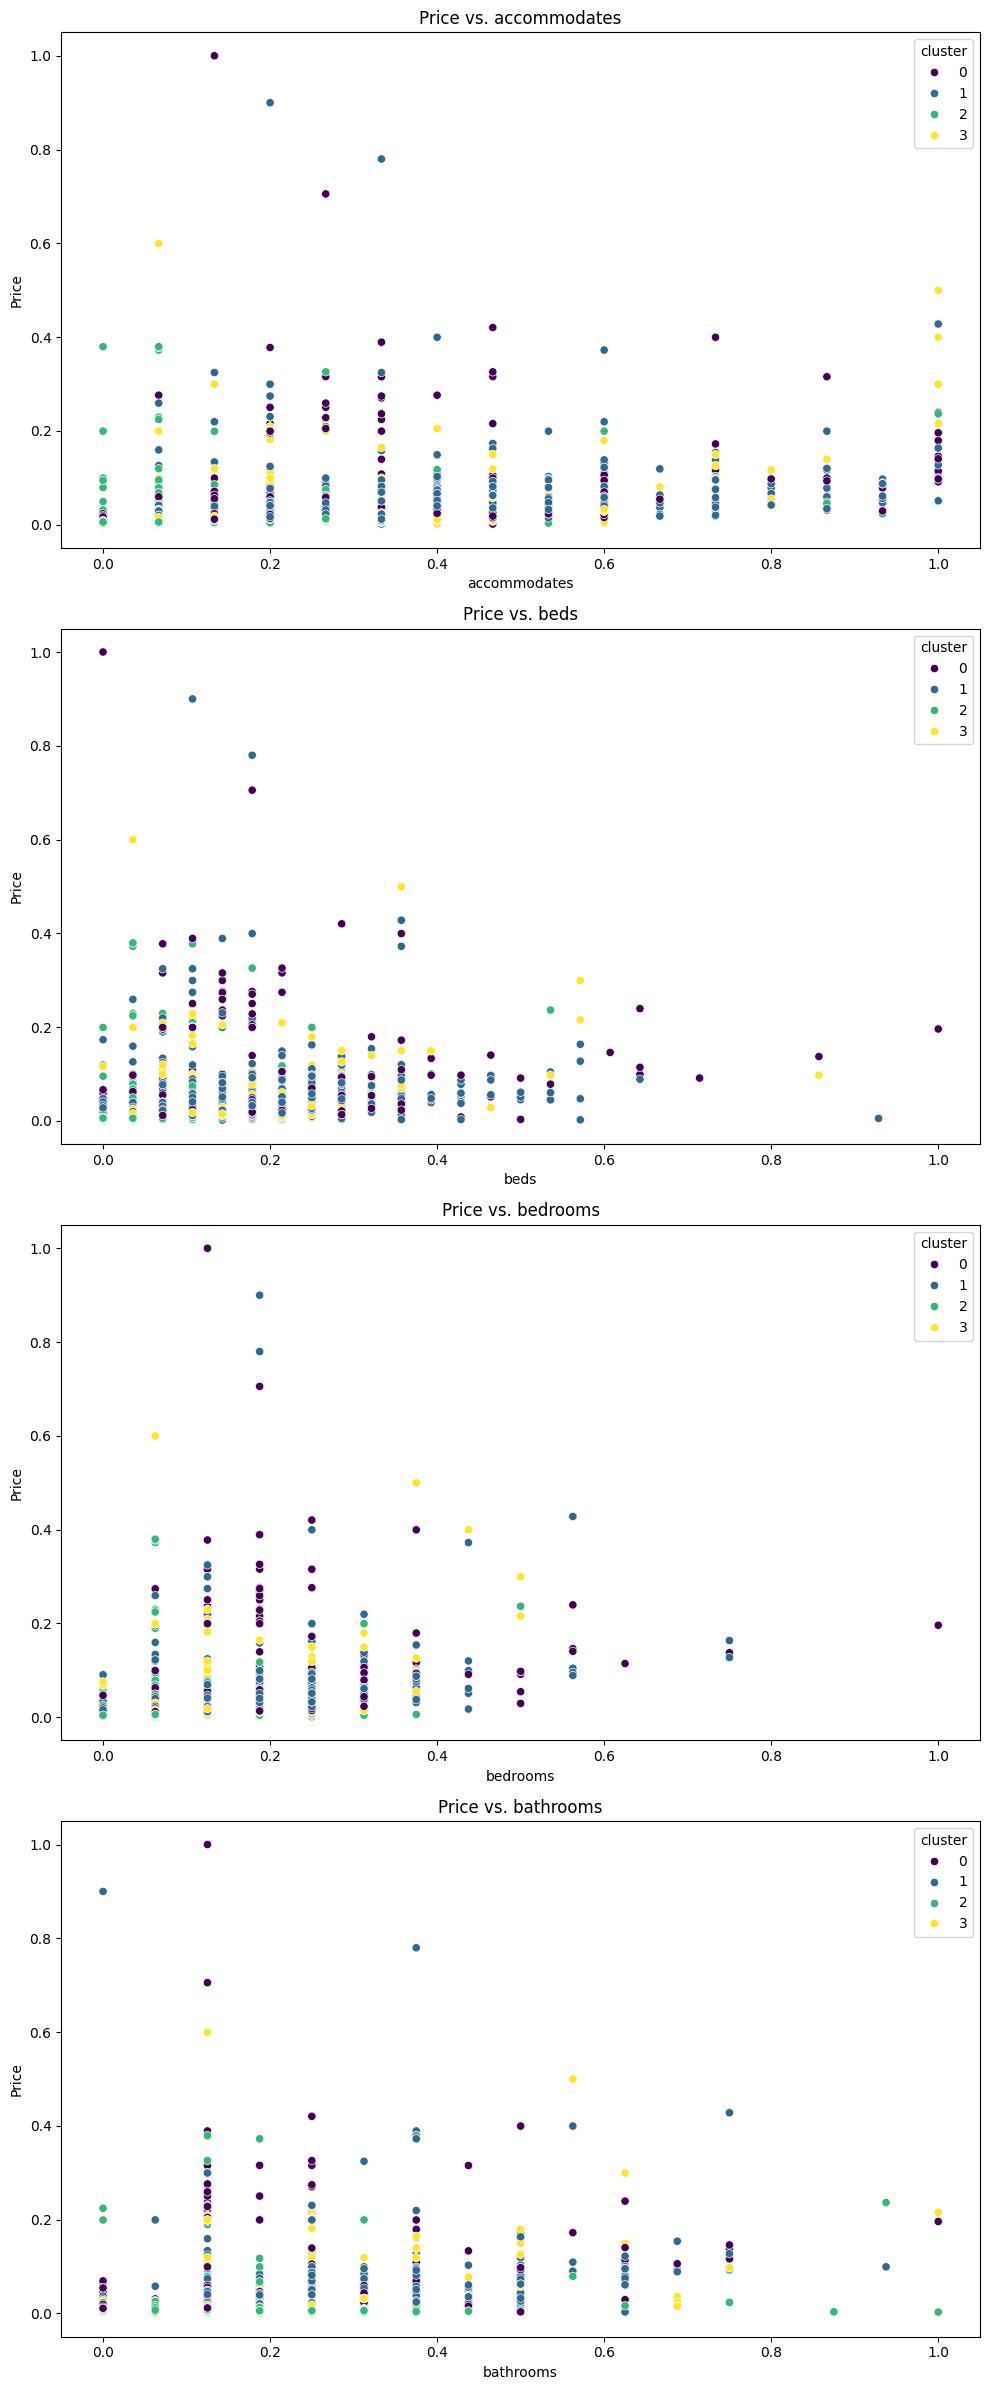

In [46]:
# Define the features to plot against 'price'
features = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Create a figure with subplots for each feature
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 6 * len(features)))

# Iterate through features and create visualizations
for i, feature in enumerate(features):
    ax = axes[i]  # Get the current subplot

    sns.scatterplot(x=feature, y='price', hue='cluster', data=df_modelofinal, ax=ax, palette='viridis')

    ax.set_title(f'Price vs. {feature}')  # Set subplot title
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Métricas

(aquí te dejo para que expliques los resultados. Yo jugaría con varios parámetros del algoritmo K-means como los batchs, número de clusters, batch_size, y otros para ver si los resultados mejoran. En ese caso quedarte con dicho resultado y explicar porqué te has quedado con esos parámetros)

Silhouette Score: 0.7911042588289479
Calinski-Harabasz Score: 5742.035759058726
Davies-Bouldin Score: 0.2938515072584125


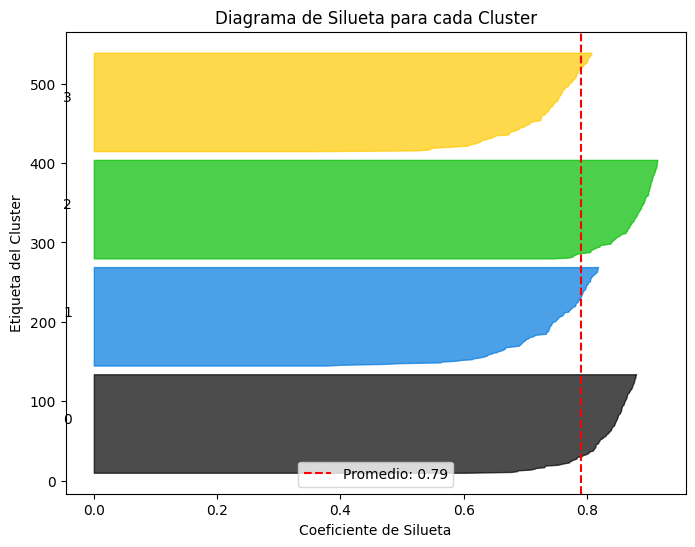

In [49]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.metrics import (
    silhouette_score,
    silhouette_samples,
    calinski_harabasz_score,
    davies_bouldin_score
)
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# 2. Aplicar KMeans para la clusterización
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# 3. Calcular las métricas de evaluación

# Silhouette Score
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Score:", ch_score)

# Davies-Bouldin Score
db_score = davies_bouldin_score(X, labels)
print("Davies-Bouldin Score:", db_score)

# 4. Visualizar la métrica con un diagrama de silueta

# Calcular el coeficiente de silueta para cada muestra
sample_silhouette_values = silhouette_samples(X, labels)

fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10  # posición inicial para el primer cluster

for i in range(n_clusters):
    # Extraer los valores de silueta para el cluster i y ordenarlos
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Elegir un color para el cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7
    )
    # Etiqueta del cluster en el centro de la banda
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # espacio entre clusters

ax.set_title("Diagrama de Silueta para cada Cluster")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Etiqueta del Cluster")

# Línea vertical con el promedio del coeficiente de silueta
ax.axvline(x=sil_score, color="red", linestyle="--", label=f"Promedio: {sil_score:.2f}")
ax.legend()

plt.show()